In [1]:
import numpy as np                                  # libreria matematica
from scipy.integrate import odeint                  # altra libreria matematica    odeint e' per integrare le equazioni
import matplotlib.pyplot as plt                     # librerie grafiche
import seaborn

/Users/albertomaspero/Library/Python/3.7/lib/python/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [3]:
m = 0.0                                            # fisso l'attrito 
A = np.array([[0, 1], [1,  - m]])
print(A)

from scipy import linalg as LA                # pacchetto per algebra lineare
evals, evecs = LA.eig(A)
print(evals)
print(evecs) 

[[ 0.  1.]
 [ 1. -0.]]
[ 1.+0.j -1.+0.j]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


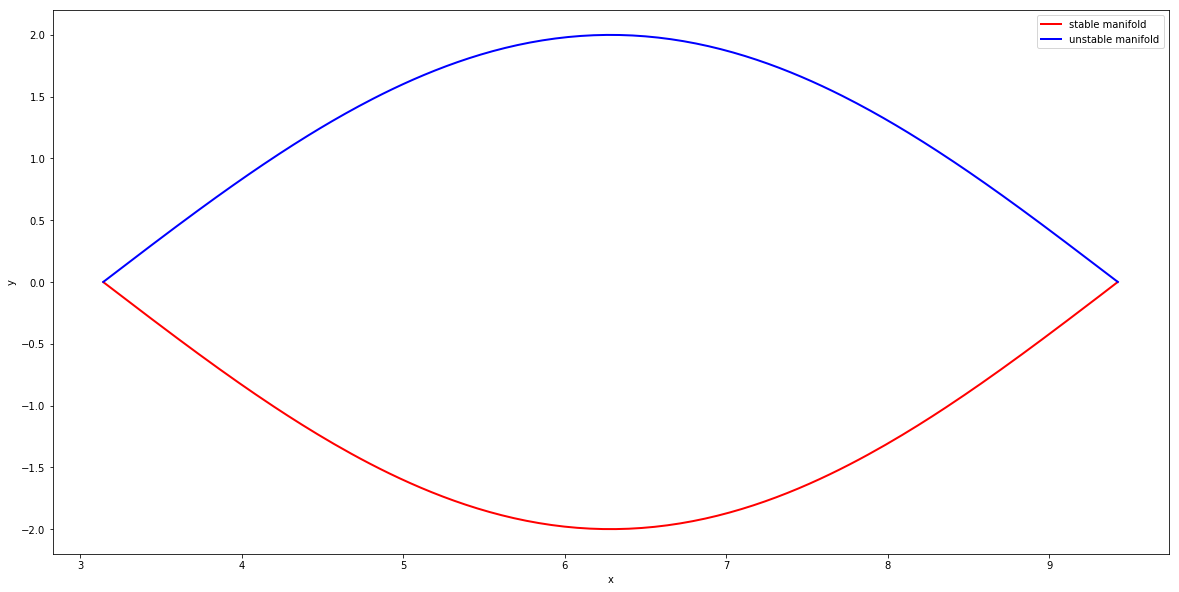

In [20]:
# function that returns vector field
def model(x_y, t, eps):
    x, y  = x_y
    dxdt =  y
    dydt = - np.sin(x)+ eps*np.cos(t)
    return [dxdt, dydt]

# distanza dal punto fisso da cui partiamo
eps = 0.00



# dimensione della figura
plt.figure(figsize=(20,10))


# autovettori
#varietà stabile lineare
vs = evecs[:,1]
#varietà instabile lineare
vu = evecs[:,0]

################### STABLE MANIFOLD
# time points
t = np.linspace(0,20, 500)
delta = 0.001
# initial condition for the stable manifold 1    evecs[1] è il vettore a due componenti della varietà stabile
#xs0 = np.pi + delta*vs[0]
#ys0 = 0.0 +  delta*vs[1]

# initial condition for the stable manifold 2
xs1 = np.pi - delta*vs[0]
ys1 = 0.0 -  delta*vs[1]

# solve ODEs
#sm0 = odeint(model,[xs0, ys0],t, args=(eps,))         #ricordiamoci di invertire il tempo!! stiamo calcolando la varietà stabile
sm1 = odeint(model, [xs1, ys1], -t, args=(eps,))

# plot results
#plt.plot(sm0[:,0], sm0[:,1],'r-',linewidth=2,label='stable manifold')    # è il primo ramo della varietà stabile
plt.plot(sm1[:,0], sm1[:,1],'r-',linewidth=2, label='stable manifold')    # è il primo ramo della varietà stabile
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



################### UNSTABLE MANIFOLD
# time points
t = np.linspace(0,20, 1000)

# initial condition for the unstable manifold 1
xu0 = np.pi + delta*vu[0]
yu0 = 0.0 +  delta*vu[1]

# initial condition for the unstable manifold 2
#xu1 = np.pi - delta*vu[0]
#yu1 = 0.0 -  delta*vu[1]

# solve ODEs
um0 = odeint(model,[xu0, yu0],t, args=(eps,))         #ricordiamoci di invertire il tempo!! stiamo calcolando la varietà stabile
#um1 = odeint(model, [xu1, yu1], t, args=(eps,))

# plot results
plt.plot(um0[:,0], um0[:,1],'b-',linewidth=2,label='unstable manifold')    # è il primo ramo della varietà stabile
#plt.plot(um1[:,0], um1[:,1],'b-',linewidth=2)    # è il primo ramo della varietà stabile
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



plt.show()

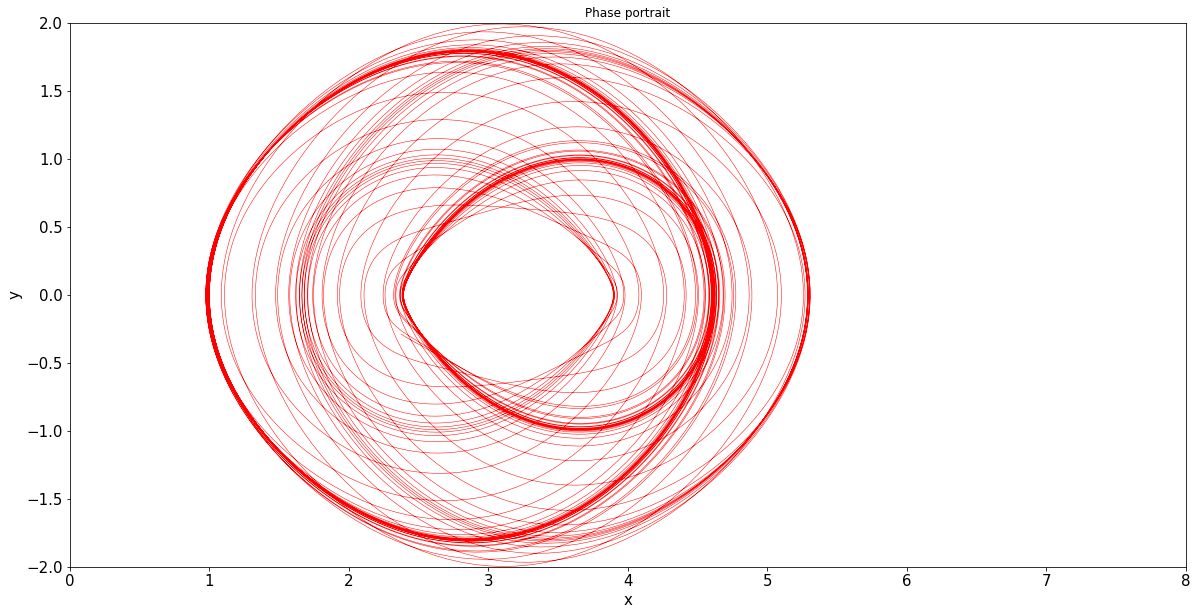

In [37]:
# Program 09c: Phase portrait and Poincare map of a nonautonomous ODE.
# See Figure 9.11(b).
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


xmin, xmax = 0, 8
ymin, ymax = -2, 2
k = 0.3
omega = 1.25
gamma = 0.5

def dx_dt(x, t):
    return [x[1], np.sin(x[0]) + gamma * np.cos(omega*t)]

# Phase portrait.
t = np.linspace(0, 500, 10000)
xs = odeint(dx_dt, [1, 0], t)

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(xs[:, 0], xs[:, 1], "r-", lw=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax);
plt.title('Phase portrait')


# The Poincare section. Plot 4000 points.
#x = []
#y = []

#t=np.linspace(0, 4000*(2*np.pi)/omega, 16000000)
#xs = odeint(dx_dt, [1, 0], t)

#x = [xs[4000*i, 0] for i in range(4000)]
#y = [xs[4000*i, 1] for i in range(4000)]
#ax.scatter(x, y, color = 'blue', s=0.1)
#plt.xlabel('x', fontsize=15)
#plt.ylabel('y', fontsize=15)
#plt.tick_params(labelsize=15)
#plt.title('The Poincare section')
plt.show()